# Explore Dataset

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from tqdm import tqdm

In [2]:
df_breast = pd.read_csv('../data/breast-level_annotations.csv')
df_findings = pd.read_csv('../data/finding_annotations.csv')

In [3]:
total_count = df_findings['image_id'].nunique()
print("Total count of unique image_ids: ", total_count)

Total count of unique image_ids:  20000


## Breast Level Annotations

## Sample Image

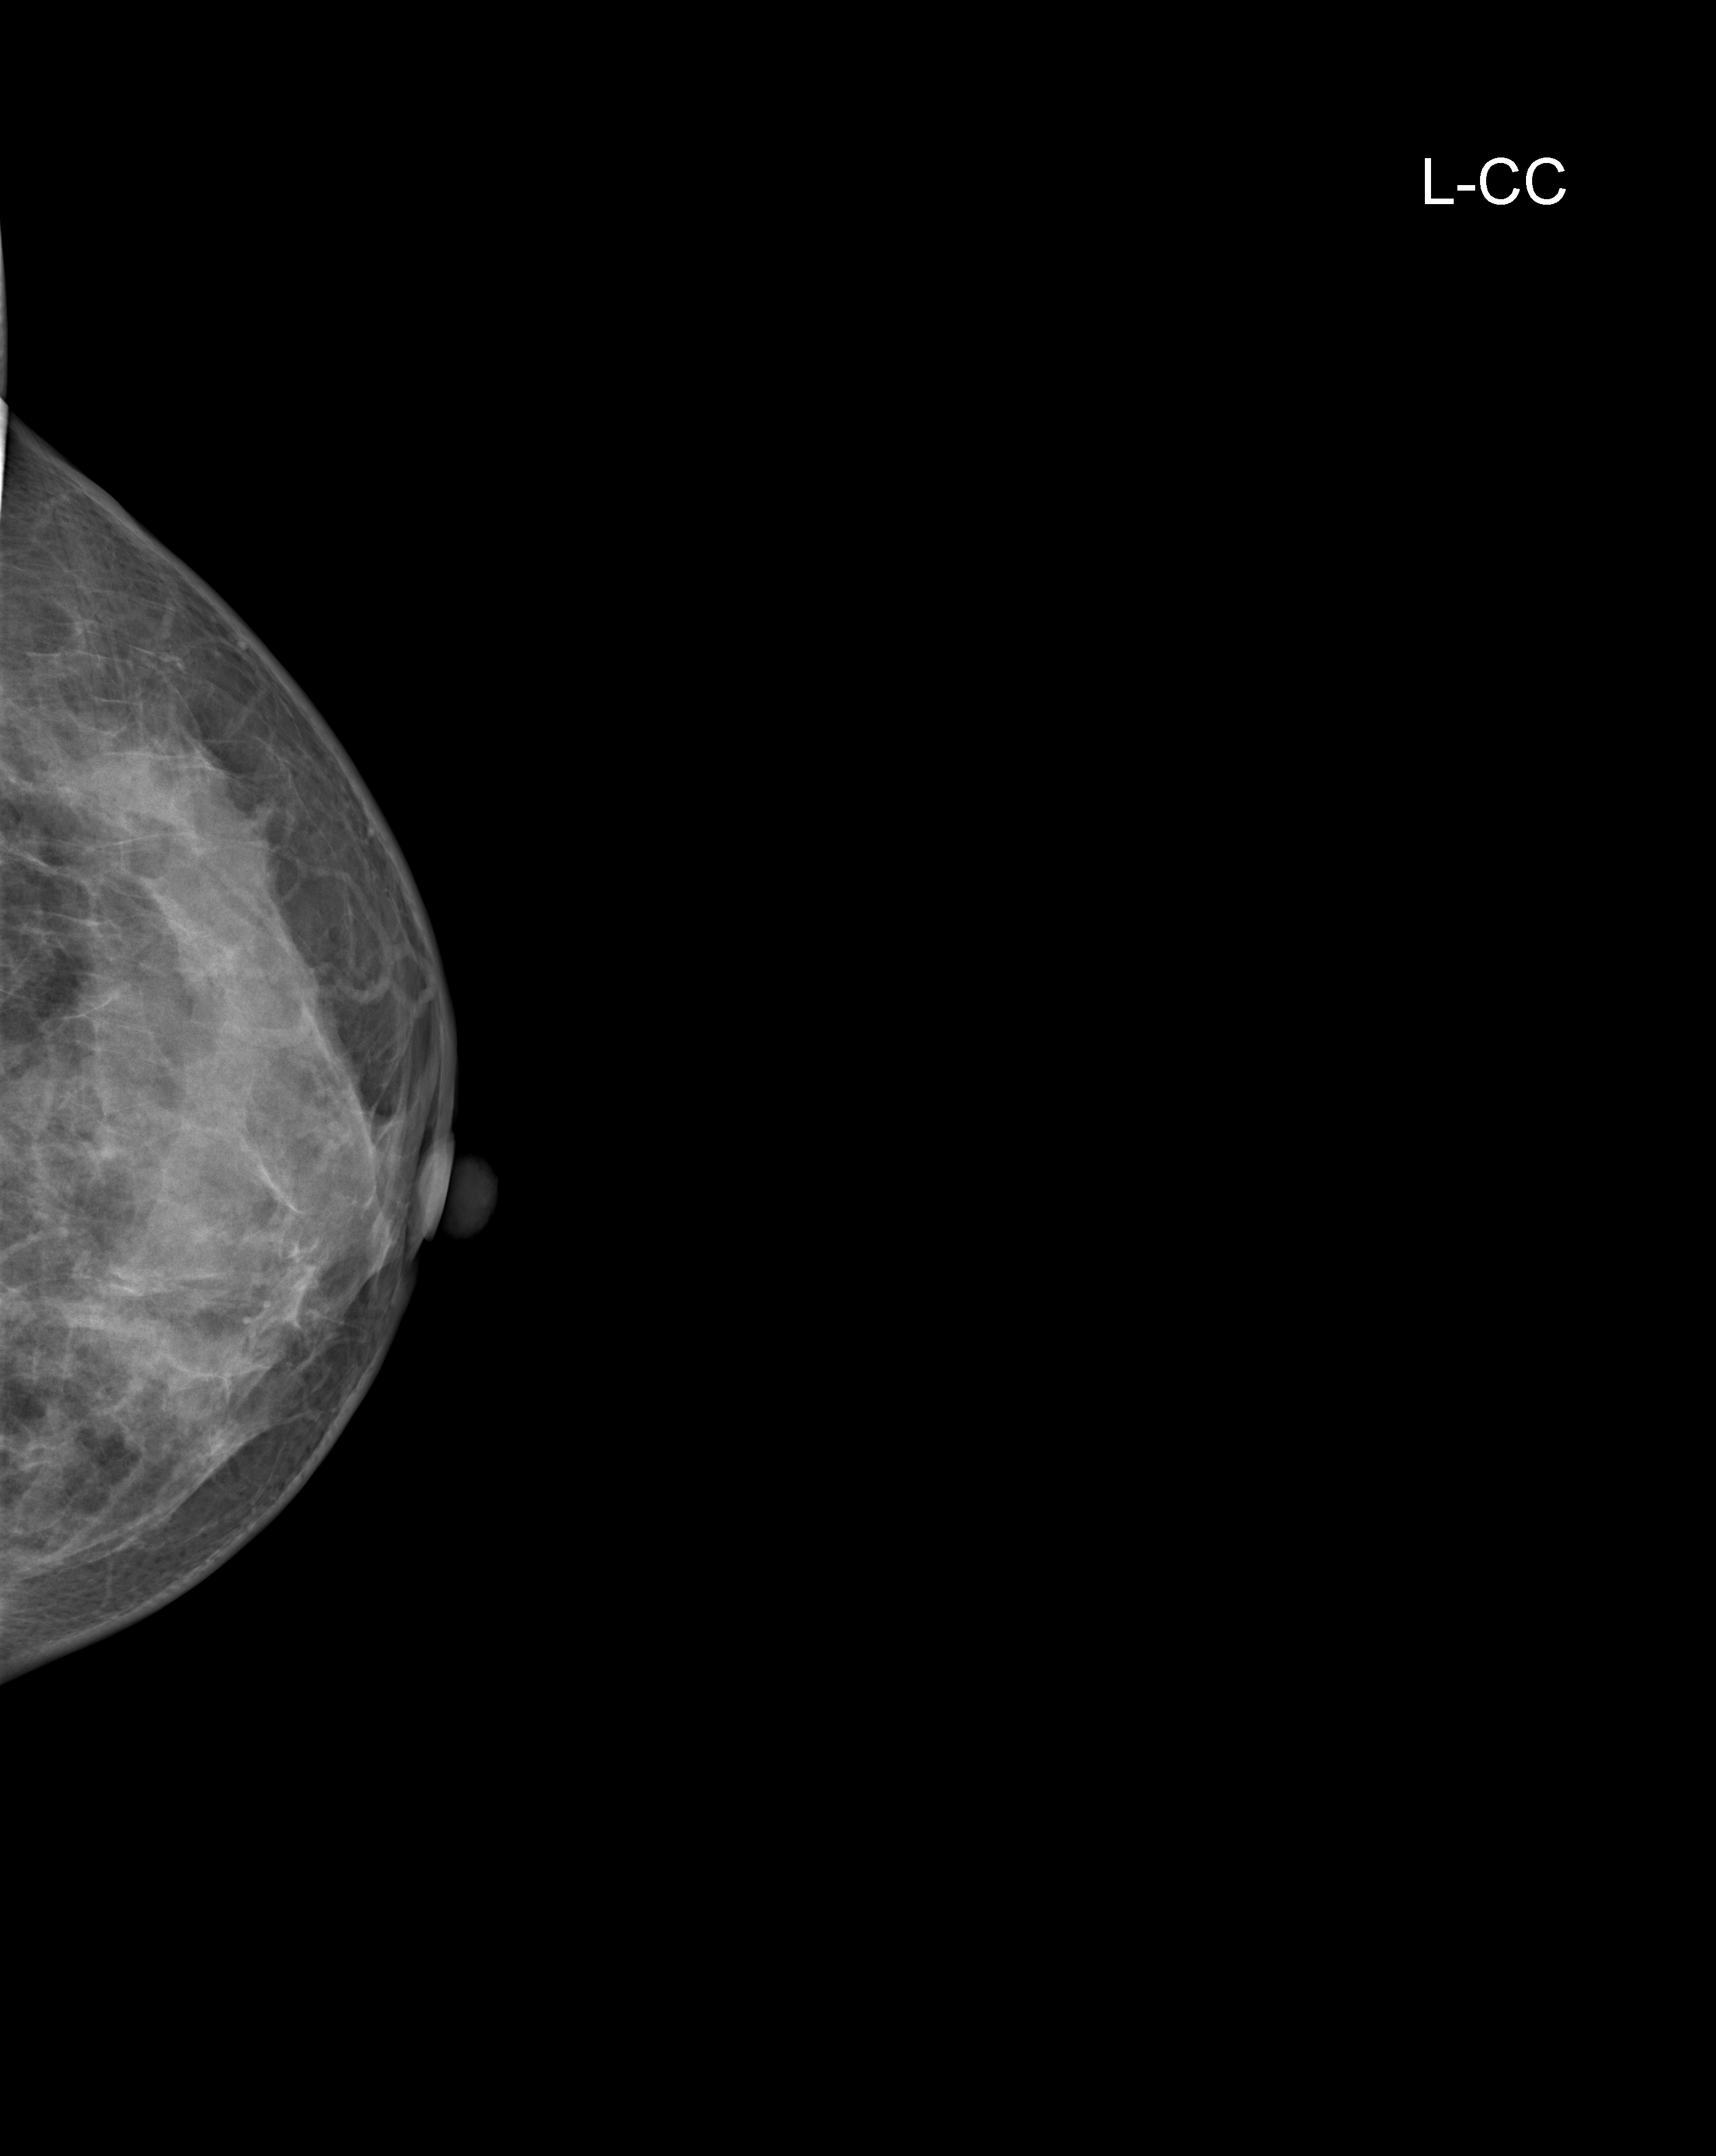

In [4]:
display(Image(filename='../data/sample_images/1b66d3ea1dae116b7c0e87e3caab3340.png'))

### Data Balance

Split:
training    16000
test         4000
Name: split, dtype: int64

Laterality:
L    10000
R    10000
Name: laterality, dtype: int64

BI-RADS:
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: breast_birads, dtype: int64

View Position:
CC     10001
MLO     9999
Name: view_position, dtype: int64

Shape:
2800x3518    15244
2012x2812     3796
2812x3580      365
2718x3580       50
2702x3580       48
2750x3580       41
2606x3580       41
2670x3580       40
2654x3580       33
2686x3580       30
2766x3580       27
2734x3580       27
2622x3580       21
2638x3580       20
2706x3580       12
2798x3580       11
2736x3580       10
2681x3580       10
2782x3580       10
2772x3580        9
2742x3580        9
2712x3580        9
2700x3580        9
2694x3580        8
2675x3580        8
2754x3580        8
2724x3580        7
2730x3580        7
2657x3580        6
2621x3580        5
2639x3580        5
2597x3580        5
2615x3580        5
2687x3580      

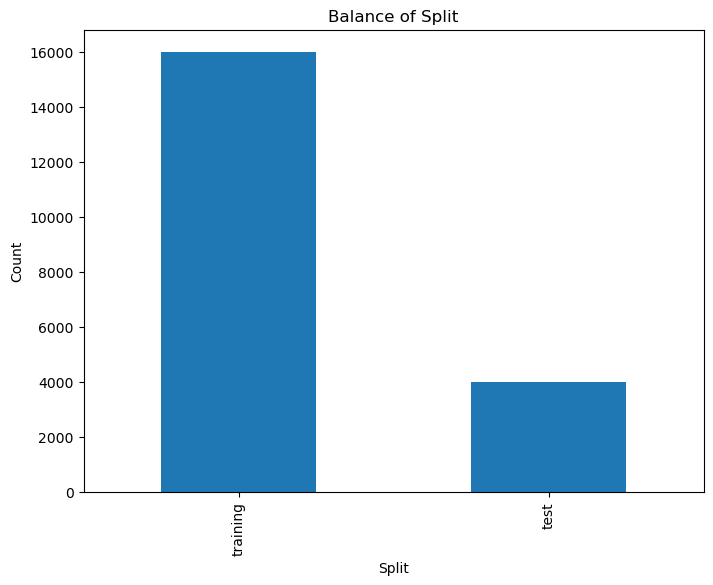

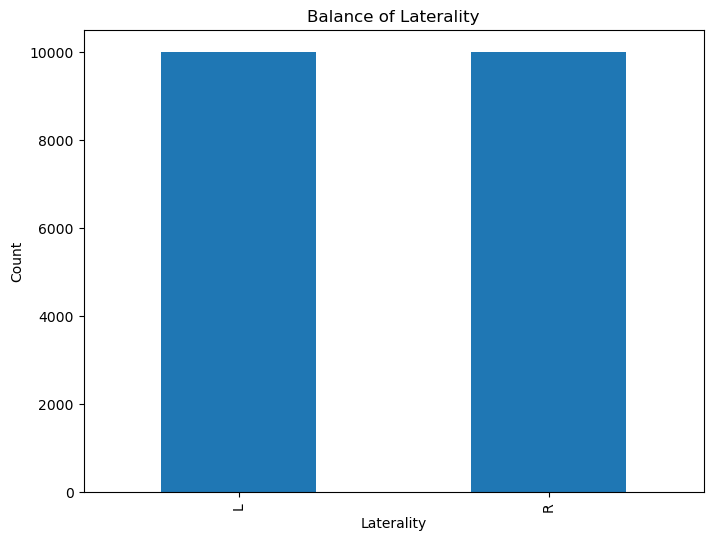

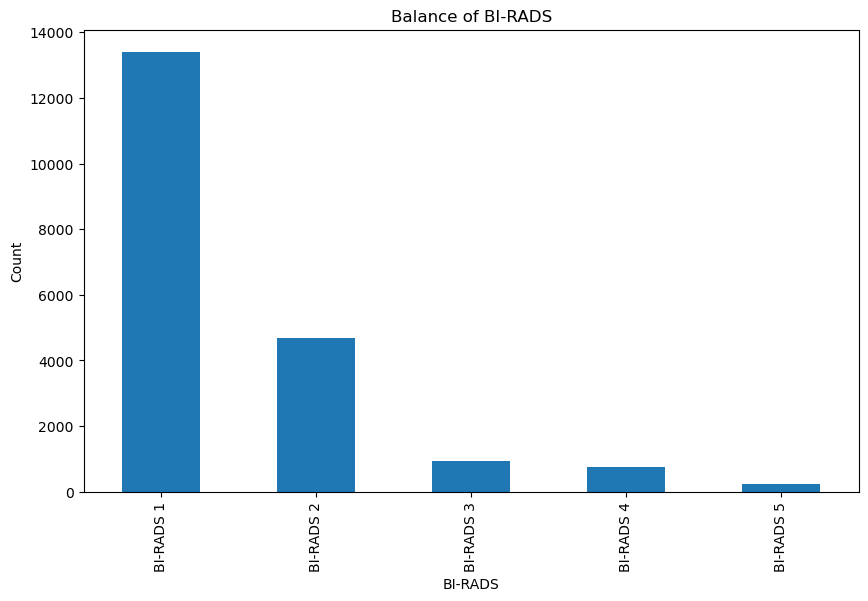

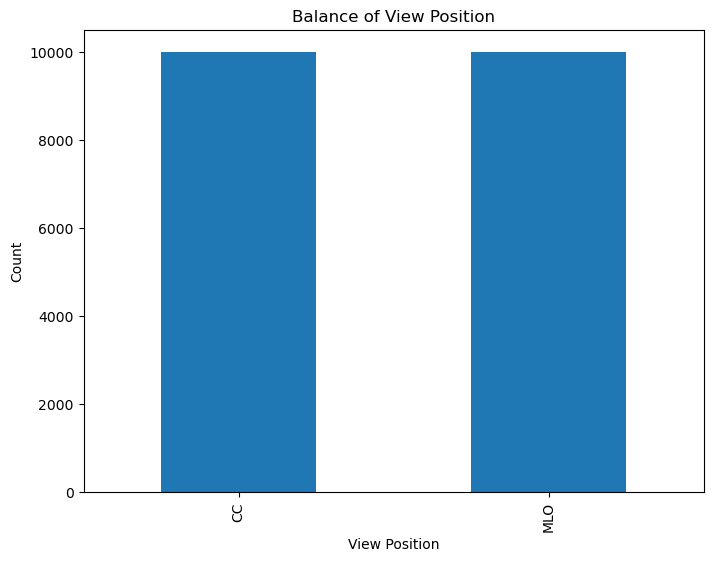

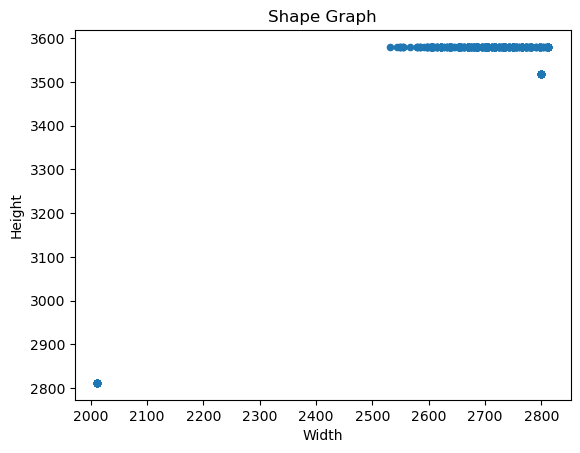

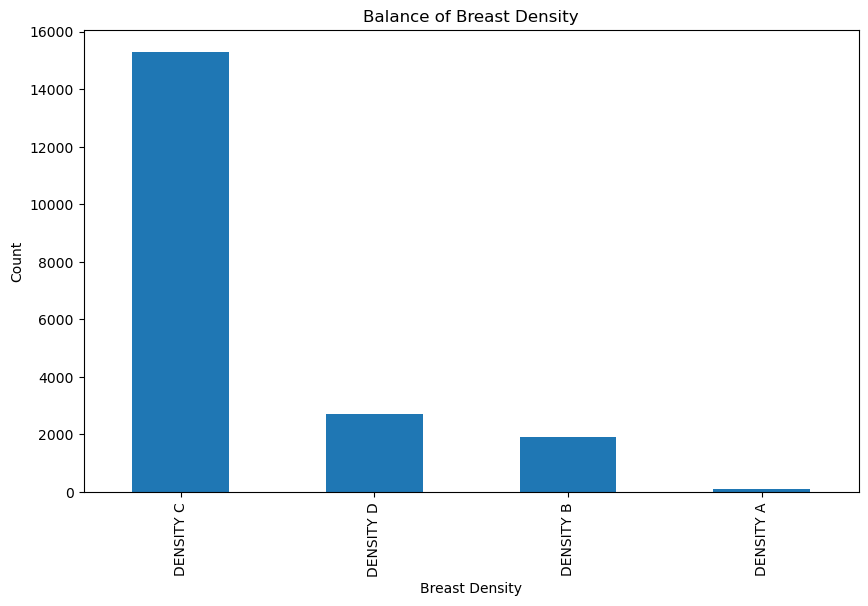

In [5]:
df_breast_copy = df_breast.copy()
df_breast_copy.loc[:, 'image_shape'] = df_breast_copy['width'].astype(str) + 'x' + df_breast_copy['height'].astype(str)
df_breast = df_breast_copy.copy()

balance_split = df_breast['split'].value_counts()
balance_laterality = df_breast['laterality'].value_counts()
balance_view_position = df_breast['view_position'].value_counts()
balance_birads = df_breast['breast_birads'].value_counts()
balance_density = df_breast['breast_density'].value_counts()
balance_shape = df_breast['image_shape'].value_counts()


print("Split:")
print(balance_split)
print()

print("Laterality:")
print(balance_laterality)
print()

print("BI-RADS:")
print(balance_birads)
print()

print("View Position:")
print(balance_view_position)
print()

print("Shape:")
print(balance_shape)
print()

print("Density:")
print(balance_density)


# Plotting split
plt.figure(figsize=(8, 6))
balance_split.plot(kind='bar')
plt.title('Balance of Split')
plt.xlabel('Split')
plt.ylabel('Count')
plt.show()

# Plotting laterality
plt.figure(figsize=(8, 6))
balance_laterality.plot(kind='bar')
plt.title('Balance of Laterality')
plt.xlabel('Laterality')
plt.ylabel('Count')
plt.show()

# Plotting breast_birads
plt.figure(figsize=(10, 6))
balance_birads.plot(kind='bar')
plt.title('Balance of BI-RADS')
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.show()

# Plotting view_position
plt.figure(figsize=(8, 6))
balance_view_position.plot(kind='bar')
plt.title('Balance of View Position')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()

# Plotting shape
df_breast.plot(x='width', y='height', kind='scatter')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Shape Graph')
plt.show()

# Plotting breast_density
plt.figure(figsize=(10, 6))
balance_density.plot(kind='bar')
plt.title('Balance of Breast Density')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.show()

## Finding Annotations

### Annotation per image statistics

In [6]:
min_rows_by_image = df_findings['image_id'].value_counts().min()
max_rows_by_image = df_findings['image_id'].value_counts().max()
avg_rows_by_image = df_findings['image_id'].value_counts().mean()

print("Minimum Number of Data Rows by image_id:", min_rows_by_image)
print("Maximum Number of Data Rows by image_id:", max_rows_by_image)
print("Average Number of Data Rows by image_id:", avg_rows_by_image)

Minimum Number of Data Rows by image_id: 1
Maximum Number of Data Rows by image_id: 7
Average Number of Data Rows by image_id: 1.0243


finding_categories:
['No Finding']                                                                                      18232
['Mass']                                                                                             1123
['Suspicious Calcification']                                                                          402
['Focal Asymmetry']                                                                                   232
['Architectural Distortion']                                                                           95
['Asymmetry']                                                                                          90
['Suspicious Calcification', 'Mass']                                                                   82
['Suspicious Lymph Node']                                                                              57
['Skin Thickening']                                                                                    38
['Suspicious Calcification

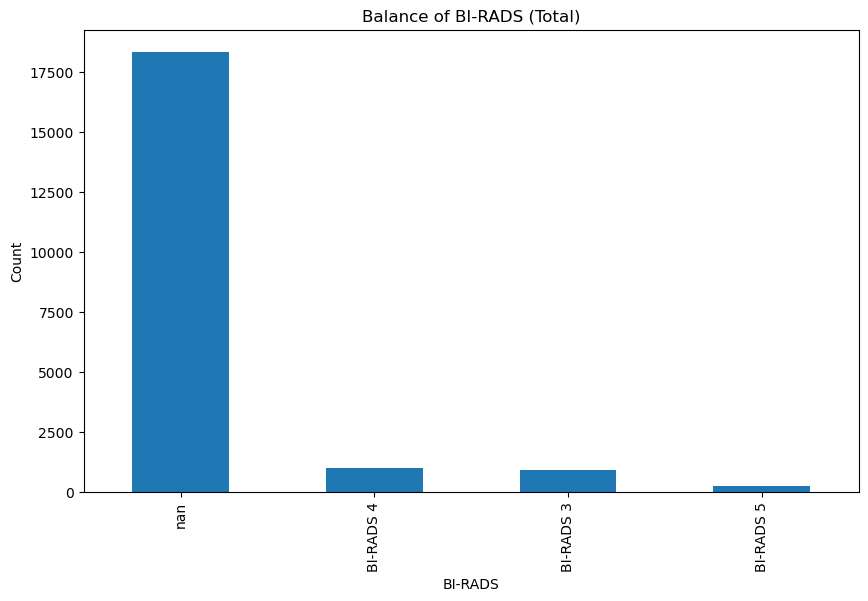

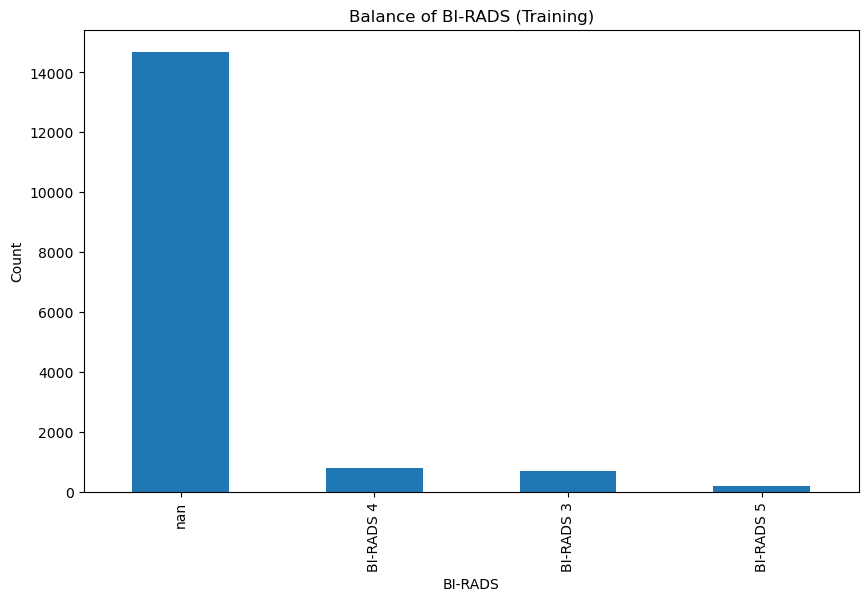

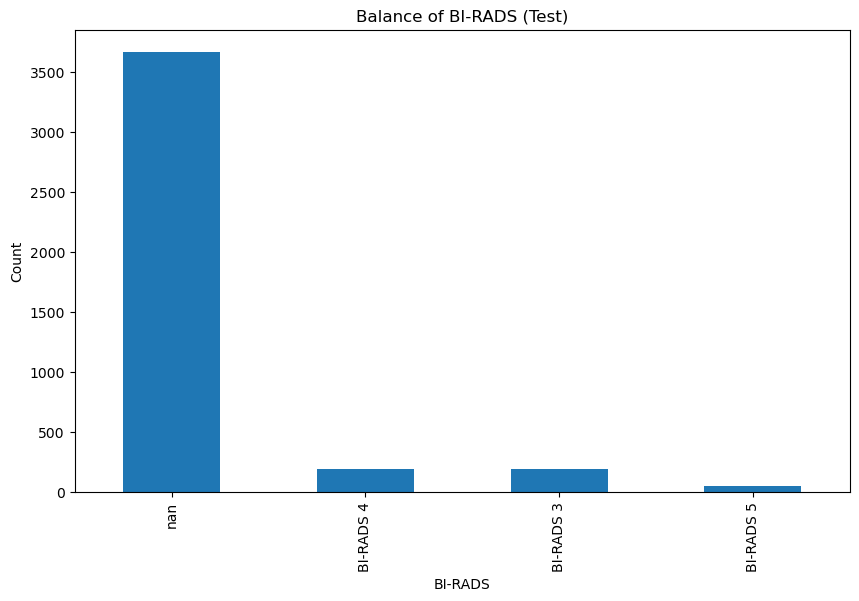

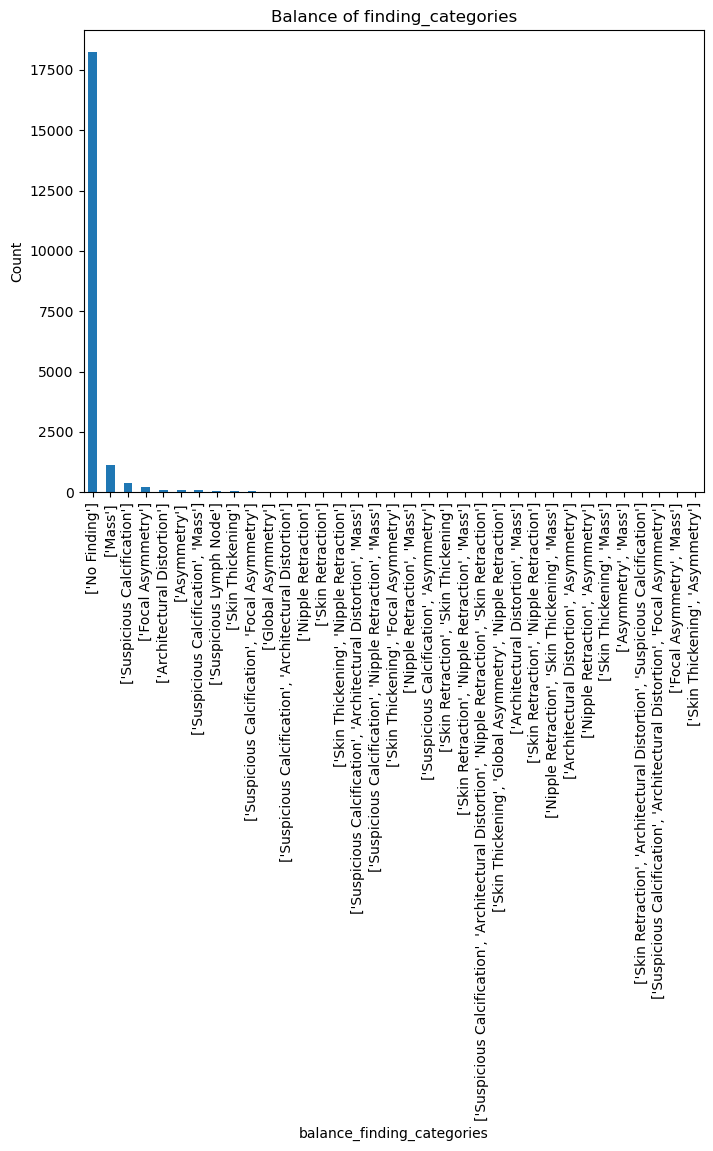

In [7]:
balance_finding_categories = df_findings['finding_categories'].value_counts(dropna=False)
balance_birads_total = df_findings['finding_birads'].value_counts(dropna=False)
balance_birads_training = df_findings[df_findings['split'] == 'training']['finding_birads'].value_counts(dropna=False)
balance_birads_test = df_findings[df_findings['split'] == 'test']['finding_birads'].value_counts(dropna=False)

print("finding_categories:")
print(balance_finding_categories)
print()

print("BI-RADS (Total):")
print(balance_birads_total)
print()

print("BI-RADS (Training):")
print(balance_birads_training)
print()

print("BI-RADS (Test):")
print(balance_birads_test)
print()

# Plotting breast_birads total
plt.figure(figsize=(10, 6))
balance_birads_total.plot(kind='bar')
plt.title('Balance of BI-RADS (Total)')
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.show()

# Plotting breast_birads training
plt.figure(figsize=(10, 6))
balance_birads_training.plot(kind='bar')
plt.title('Balance of BI-RADS (Training)')
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.show()

# Plotting breast_birads test
plt.figure(figsize=(10, 6))
balance_birads_test.plot(kind='bar')
plt.title('Balance of BI-RADS (Test)')
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.show()

# Plotting laterality
plt.figure(figsize=(8, 6))
balance_finding_categories.plot(kind='bar')
plt.title('Balance of finding_categories')
plt.xlabel('balance_finding_categories')
plt.ylabel('Count')
plt.show()

### valid/invalid annotations

In [8]:
valid_rows = (
    (
        (df_findings['xmin'] >= 0) &
        (df_findings['xmax'] > df_findings['xmin']) &
        (df_findings['xmax'] <= df_findings['width']) &
        (df_findings['ymin'] >= 0) &
        (df_findings['ymax'] > df_findings['ymin']) &
        (df_findings['ymax'] <= df_findings['height'])
    )
    |
    (
        df_findings['xmin'].isna() & df_findings['ymin'].isna() & df_findings['xmax'].isna() & df_findings['ymax'].isna() 
    )
    
)
invalid_rows = ~valid_rows

num_valid_rows = valid_rows.sum()
num_invalid_rows = invalid_rows.sum()

# Print some examples of valid rows
print("Examples of Valid Rows:")
print(df_findings.loc[valid_rows, ['image_id', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].sample(5))

print()

# Print some examples of invalid rows
print("Examples of Invalid Rows:")
print(df_findings.loc[invalid_rows, ['image_id', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].sample(5))

print("Number of Valid Data Rows:", num_valid_rows)
print("Number of Invalid Data Rows:", num_invalid_rows)

Examples of Valid Rows:
                               image_id        xmin        ymin       xmax  \
10404  5b0fe52f8470b480c3fe575be1d9439b         NaN         NaN        NaN   
1202   fd5b39474bd0c0e81bf3af47bbc0c487  487.044006  1813.26001  947.86499   
10266  9b49d193a92d78bcba467d5b15beaa50         NaN         NaN        NaN   
3019   7245c3cc53d85c78dccd88624f84c3ac         NaN         NaN        NaN   
5139   545dd91cba6ed71fa2785fdd95b76436         NaN         NaN        NaN   

             ymax  width  height  
10404         NaN   2800    3518  
1202   2075.47998   2800    3518  
10266         NaN   2800    3518  
3019          NaN   2800    3518  
5139          NaN   2800    3518  

Examples of Invalid Rows:
                              image_id         xmin         ymin         xmax  \
628   1aedd7fc33c55fb511e2dcb7a8493509    -3.412000  1571.739990   485.959991   
727   dc60a7e10efddef70dd265cb3b82c74b  2698.010010  1564.300049  2812.360107   
2047  6b6b65d46cf68b3673b9a

In [9]:
# Calculate the bbox area
df_findings['bbox_area'] = (df_findings['xmax'] - df_findings['xmin']) * (df_findings['ymax'] - df_findings['ymin'])

# Calculate the image area
df_findings['image_area'] = df_findings['width'] * df_findings['height']

# Calculate the bbox area to image area percentage
df_findings['bbox_area_percentage_individual'] = (df_findings['bbox_area'] / df_findings['image_area']) * 100

# Calculate the statistics
bbox_area_percentage_stats = df_findings['bbox_area_percentage_individual'].describe()

# Print the statistics
print("Bbox Area to Image Area Percentage Statistics:")
print(bbox_area_percentage_stats[['min', 'max', 'mean']])

Bbox Area to Image Area Percentage Statistics:
min      0.005343
max     27.635832
mean     1.256729
Name: bbox_area_percentage_individual, dtype: float64


In [10]:
# Group by image_id and calculate the total bbox area and total image area for each image
image_areas = df_findings.groupby('image_id')[['bbox_area', 'image_area']].agg({'bbox_area': 'sum', 'image_area': 'mean'})

image_areas = image_areas[image_areas['bbox_area'] > 0]
# Calculate the bbox area to image area percentage
image_areas['bbox_area_percentage_total'] = (image_areas['bbox_area'] / image_areas['image_area']) * 100

# Calculate the statistics
bbox_area_percentage_stats = image_areas['bbox_area_percentage_total'].describe()

# Print the statistics
print("Bbox Area to Image Area Percentage Statistics:")
print(bbox_area_percentage_stats[['min', 'max', 'mean']])

df_findings.drop(columns=['bbox_area_percentage_individual', 'bbox_area', 'image_area'], inplace=True)

Bbox Area to Image Area Percentage Statistics:
min      0.010943
max     27.635832
mean     1.602187
Name: bbox_area_percentage_total, dtype: float64


## Positive-Negative Images

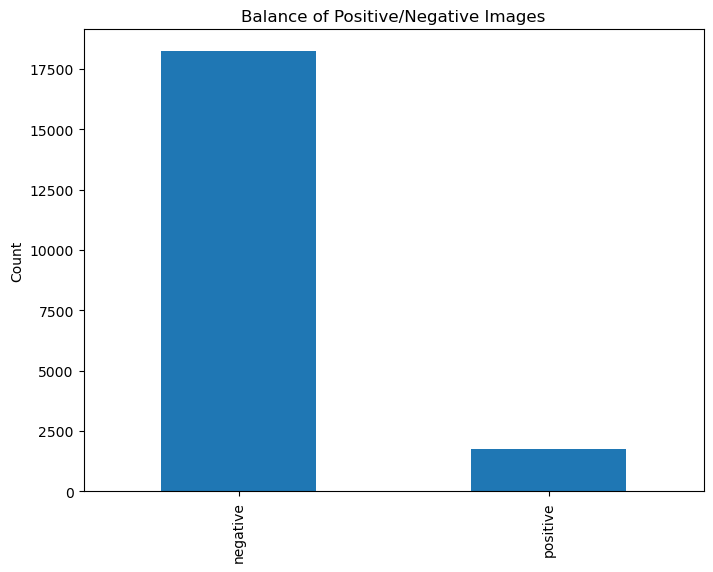

In [11]:
df_findings_temp = df_findings.drop_duplicates(subset='image_id').copy(deep=True)

# Create the new column 'is_positive_image' based on the criteria
df_findings_temp['is_positive_image'] = df_findings_temp['xmin'].notnull() & df_findings_temp['ymin'].notnull() & df_findings_temp['xmax'].notnull() & df_findings_temp['ymax'].notnull()

# Convert boolean values to 'positive' or 'negative'
df_findings_temp['is_positive_image'] = df_findings_temp['is_positive_image'].apply(lambda x: 'positive' if x else 'negative')

balance_positive_images = df_findings_temp['is_positive_image'].value_counts(dropna=False)

# Plotting positive image balance
plt.figure(figsize=(8, 6))
balance_positive_images.plot(kind='bar')
plt.title('Balance of Positive/Negative Images')
plt.ylabel('Count')
plt.show()

# Export Annotations

## Ultralytics YOLO format

In [123]:
df_ultralytics = df_findings[['image_id', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'split']].copy(deep=True)

df_ultralytics['x_center'] = ((df_ultralytics['xmax'] + df_ultralytics['xmin']) / 2) / df_ultralytics['width']
df_ultralytics['object_width'] = ((df_ultralytics['xmax'] - df_ultralytics['xmin'])) / df_ultralytics['width']
df_ultralytics['y_center'] = ((df_ultralytics['ymax'] + df_ultralytics['ymin']) / 2) / df_ultralytics['height']
df_ultralytics['object_height'] = ((df_ultralytics['ymax'] - df_ultralytics['ymin'])) / df_ultralytics['height']
df_ultralytics['class'] = 0

df_ultralytics_txt = df_ultralytics[['image_id', 'class', 'x_center', 'y_center', 'object_width', 'object_height', 'split']].copy(deep=True)

df_ultralytics_txt

image_id  class  x_center  y_center  \
0      4e3a578fe535ea4f5258d3f7f4419db8      0  0.863950  0.509436   
1      dac39351b0f3a8c670b7f8dc88029364      0  0.872943  0.368768   
2      c83f780904f25eacb44e9030f32c66e1      0  0.889932  0.476232   
3      893528bc38a0362928a89364f1b692fd      0  0.811434  0.516977   
4      318264c881bf12f2c1efe5f93920cc37      0  0.814464  0.584788   
...                                 ...    ...       ...       ...   
20481  ea732154d149f619b20070b78060ae65      0       NaN       NaN   
20482  4689616c3d0b46fcba7a771107730791      0       NaN       NaN   
20483  3c22491bcf1d0b004715c28d80981cdd      0       NaN       NaN   
20484  d443b9725e331b8b27589aa725597801      0       NaN       NaN   
20485  45c1239cc36b0e672f0072707fd05c6f      0       NaN       NaN   

       object_width  object_height     split  
0          0.045657       0.034426  training  
1          0.041114       0.032243  training  
2          0.151879       0.289298  training  
3          0.226961       0.213238  training  
4          0.077286       0.051094  training  
...             ...            ...       ...  
20481           NaN            NaN  training  
20482           NaN            NaN  training  
20483           NaN            NaN  training  
20484           NaN            NaN  training  
20485           NaN            NaN  training  

[20486 rows x 7 columns]

In [124]:
out_dir = Path('..', 'data', 'out', 'ultralytics', 'basic').resolve()
labels_dir = out_dir.joinpath('labels')
labels_dir.mkdir(parents=True, exist_ok=True)

print(labels_dir)

/home/emrekara/yl/vindr-mammo-study/data-preperation/data/out/ultralytics/basic/labels


In [125]:
df_ultralytics_txt_train = df_ultralytics_txt[df_ultralytics_txt['split'] == 'training'].drop(columns=['split'])
train_image_ids = df_ultralytics_txt_train['image_id'].unique().tolist()
positive_train_image_ids = df_ultralytics_txt_train[
                               df_ultralytics_txt_train['x_center'].notnull() &
                               df_ultralytics_txt_train['y_center'].notnull() &
                               df_ultralytics_txt_train['object_width'].notnull() &
                               df_ultralytics_txt_train['object_height'].notnull()]['image_id'].unique().tolist()

with open(out_dir.joinpath('train.txt'), 'w') as f:
    for image_id in tqdm(train_image_ids):
        save_path = labels_dir.joinpath('{}.txt'.format(image_id))
        if image_id in positive_train_image_ids:
            df_ultralytics_txt_train[df_ultralytics_txt_train['image_id'] == image_id][['class', 'x_center', 'y_center', 'object_width', 'object_height']].round(6).to_csv(str(save_path), sep=' ' ,index=False, header=False)
        f.write('./images/{}.png\n'.format(image_id))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16000/16000 [00:05<00:00, 3071.00it/s]


In [126]:
df_ultralytics_txt_val = df_ultralytics_txt[df_ultralytics_txt['split'] == 'test'].drop(columns=['split'])
val_image_ids = df_ultralytics_txt_val['image_id'].unique().tolist()
positive_val_image_ids = df_ultralytics_txt_val[
                               df_ultralytics_txt_val['x_center'].notnull() &
                               df_ultralytics_txt_val['y_center'].notnull() &
                               df_ultralytics_txt_val['object_width'].notnull() &
                               df_ultralytics_txt_val['object_height'].notnull()]['image_id'].unique().tolist()

with open(out_dir.joinpath('val.txt'), 'w') as f:
    for image_id in tqdm(val_image_ids):
        save_path = labels_dir.joinpath('{}.txt'.format(image_id))
        if image_id in positive_val_image_ids:
            df_ultralytics_txt_val[df_ultralytics_txt_val['image_id'] == image_id][['class', 'x_center', 'y_center', 'object_width', 'object_height']].round(6).to_csv(str(save_path), sep=' ' ,index=False, header=False)
        f.write('./images/{}.png\n'.format(image_id))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:01<00:00, 3863.86it/s]


## CSV format for TfRecord

In [127]:
df_findings_copy = df_findings.copy(deep=True)
df_findings_copy['finding_birads'] = 'finding'
# Group by image_id and aggregate xmin, ymin, xmax, ymax into a list
grouped_boxes = df_findings_copy.groupby('image_id').agg({'xmin': list, 'ymin': list, 'xmax': list, 'ymax': list}).reset_index()

# Rename the columns
grouped_boxes.columns = ['image_id', 'boxes_xmin', 'boxes_ymin', 'boxes_xmax', 'boxes_ymax']

# Group by image_id and aggregate finding_birads into a list
grouped_birads = df_findings_copy.groupby('image_id')['finding_birads'].agg(list).reset_index()

# Keep the other columns by selecting the first row for each group
other_columns = df_findings_copy.groupby('image_id').first().drop(['xmin', 'ymin', 'xmax', 'ymax', 'finding_birads'], axis=1).reset_index()

# Create the df_augmentation_info DataFrame by merging grouped_boxes, grouped_birads, and other_columns
df_findings_tfrecords = grouped_boxes.merge(grouped_birads, on='image_id').merge(other_columns, on='image_id')

# Print the df_augmentation_info DataFrame
print(df_findings_tfrecords)

                               image_id boxes_xmin boxes_ymin boxes_xmax  \
0      000470cbf12fe2b285cba99286a9a4fa      [nan]      [nan]      [nan]   
1      000611f8c6a44659a1813f4019241829      [nan]      [nan]      [nan]   
2      00095c0bc0043119471c227b056939e5      [nan]      [nan]      [nan]   
3      0009951416aad84eb87f1b94d89ec991      [nan]      [nan]      [nan]   
4      00104c12656c7d97e69fe4b097d90430      [nan]      [nan]      [nan]   
...                                 ...        ...        ...        ...   
19995  fff97c8c39c83aff37e3c747aaca8a09      [nan]      [nan]      [nan]   
19996  fffad3a46fb2225e541f531226b7b647      [nan]      [nan]      [nan]   
19997  fffdc4e37fd29095823d6d3e4d1bf338      [nan]      [nan]      [nan]   
19998  fffe9b2017e97f5d26fdf37020310e3e      [nan]      [nan]      [nan]   
19999  ffff43ffbe56fd959c81d83a5ecdc4dc      [nan]      [nan]      [nan]   

      boxes_ymax finding_birads                          study_id  \
0          [nan]  

In [128]:
df_findings_tfrecords.to_csv('../data/out/finding_annotations_processed_basic.csv', index=False)

In [129]:
total_count = df_findings_tfrecords['image_id'].nunique()
print("Total count of unique image_ids: ", total_count)

Total count of unique image_ids:  20000
